In [1]:
# Source:
# https://www.youtube.com/watch?v=65kl4eE9ovI&ab_channel=Mr.PSolver

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science','notebook'])
from itertools import combinations

In [3]:
X_COORD = 0
Y_COORD = 1

In [4]:
n_particles = 100
r = np.random.random((2, n_particles)) # Generates a 2 x n_particles array, values between 0..1

#  boolean indexing, works as a filter
ixr = r[X_COORD] > 0.5
ixl = r[X_COORD] <= 0.5

In [5]:
ids = np.arange(n_particles)

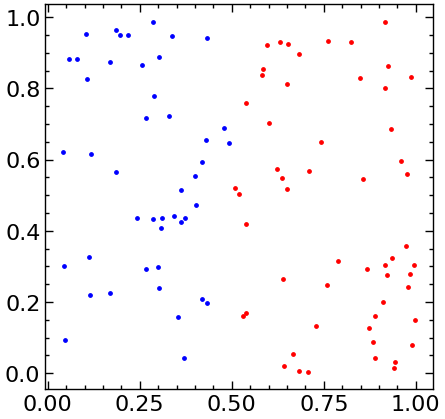

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(r[X_COORD][ixl],r[Y_COORD][ixl], color='b', s=6)
plt.scatter(r[X_COORD][ixr],r[Y_COORD][ixr], color='r', s=6)


(array([10.,  6., 13., 11.,  7.,  8., 13.,  5.,  8., 19.]),
 array([0.0415181 , 0.13719929, 0.23288047, 0.32856165, 0.42424283,
        0.51992401, 0.61560519, 0.71128637, 0.80696755, 0.90264874,
        0.99832992]),
 <BarContainer object of 10 artists>)

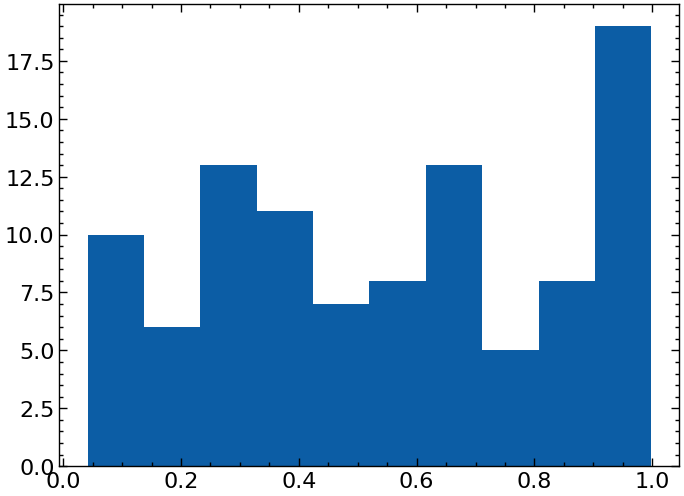

In [7]:
plt.hist(r[0])

In [8]:
v = np.zeros((2, n_particles))

In [9]:
v[X_COORD][ixr] = -500
v[Y_COORD][ixl] = 500

# Text